Total Pleiades points: 681
Total Hyades points: 26
Total Praesepe points: 551


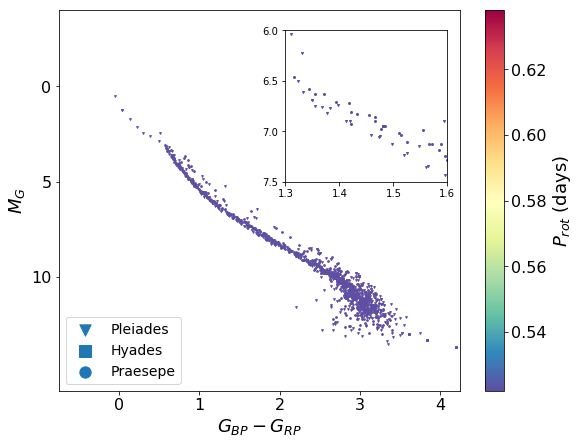

In [14]:


import pandas as panda
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
from IPython.display import set_matplotlib_formats

def main():
    Pleiades = panda.read_csv("../Pleiades/Pleiades(With Rotation).csv")
    Praesepe = panda.read_csv("../Praesepe/Praesepe(With Rotation).csv")
    Hyades = panda.read_csv("../Hyades/Hyades(With Rotation).csv")
    
    PraesepeDistMod = distMod(Praesepe['parallax'])
    PleiadesDistMod = distMod(Pleiades['parallax'])
    HyadesDistMod = distMod(Hyades['parallax'])
    
            
    # Using Davenports colormap
    cm = plt.cm.get_cmap('Spectral_r')
    fig, ax1 = plt.subplots(figsize=(9,7))
    
    # Initializing counters for number of points plotted in each cluster
    k = 0
    j = 0
    m = 0
    for i in range(len(Praesepe["bp_rp"])):
        plt.scatter(Praesepe.iloc[i]["bp_rp"], Praesepe.iloc[i]["phot_g_mean_mag"]-PraesepeDistMod[i], marker = "o", s = 3, c = Praesepe.iloc[i]["Prot1"], cmap = cm)
        m += 1
    for i in range(len(Pleiades["bp_rp"])):
        plt.scatter(Pleiades.iloc[i]["bp_rp"], Pleiades.iloc[i]["phot_g_mean_mag"]-PleiadesDistMod[i], marker = "v", s = 3, c = Pleiades.iloc[i]["Prot1"], cmap = cm)
        k += 1
    for i in range(len(Hyades)-1):
        if(not np.isnan(Hyades.iloc[i]["K2Per"])): # Sorting through the K2Per column to only plot points where the value exists.
            plt.scatter(Hyades.iloc[i]["bp_rp"], Hyades.iloc[i]["phot_g_mean_mag"]-HyadesDistMod[i], s = 7, marker = "s", c = Hyades.iloc[i]["K2Per"], cmap = cm)
            j+=1
            
            
#     Plotting first point again so that we can add them to Legend only once as opposed to many times via the loops above
    plt.scatter(Pleiades.iloc[0]["bp_rp"], Pleiades.iloc[0]["phot_g_mean_mag"] - PleiadesDistMod[0], s = 8, marker = "v", c = Pleiades.iloc[0]["Prot1"], label = "Pleiades", cmap = cm)
    plt.scatter(Hyades.iloc[0]["bp_rp"], Hyades.iloc[0]["phot_g_mean_mag"] - HyadesDistMod[0], s = 8, marker = "s", c = Hyades.iloc[0]["K2Per"], label = "Hyades", cmap = cm)
    plt.scatter(Praesepe.iloc[0]["bp_rp"], Praesepe.iloc[0]["phot_g_mean_mag"]-PraesepeDistMod[0], s = 8, marker = "o", c = Praesepe.iloc[0]["Prot1"], label = "Praesepe", cmap = cm)
    
    print("Total Pleiades points: " + str(k))
    print("Total Hyades points: " + str(j))
    print("Total Praesepe points: " + str(m))
    
    plt.ylabel("$M_G$")
    plt.xlabel("$G_{BP} - G_{RP}$")
    plt.legend(loc = "lower left", markerscale = 4)
    plt.xlim(-0.75, 4.25)
    plt.xticks([0, 1, 2, 3, 4])
    plt.ylim(16, -4)
    plt.yticks([0, 5, 10])
    
    # Setting up colorbar after colormap has been defined
    cb = plt.colorbar()
    cb.set_label("$P_{rot}$ (days)")
    
    # Defining the inset plot
    ax2 = fig.add_axes([0.475, 0.54, 0.25, 0.3])
    ax2.tick_params(labelsize = 10)
    for i in range(len(Pleiades)):
        ax2.scatter(Pleiades.iloc[i]["bp_rp"], Pleiades.iloc[i]["phot_g_mean_mag"] - PleiadesDistMod[i], marker = "v", s = 4, c = Pleiades.iloc[i]["Prot1"], cmap = cm)
    for i in range(len(Praesepe)):
        ax2.scatter(Praesepe.iloc[i]["bp_rp"], Praesepe.iloc[i]["phot_g_mean_mag"]-PraesepeDistMod[i], marker = "o", s = 4, c = Praesepe.iloc[i]["Prot1"], cmap = cm)


    for i in range(len(Hyades)):
        if(not np.isnan(Hyades.iloc[i]["K2Per"])):
            ax2.scatter(Hyades.iloc[i]["bp_rp"], Hyades.iloc[i]["phot_g_mean_mag"]-HyadesDistMod[i], s = 8, marker = "s", c = Hyades.iloc[i]["K2Per"], cmap = cm)

    ax2.set_xlim(1.3,1.6)
    ax2.set_ylim(7.5, 6)
    ax2.set_yticks([7.5, 7, 6.5, 6])


                    
    # Using Davenports image quality code:
    set_matplotlib_formats('pdf', 'png')
    plt.rcParams['savefig.dpi'] = 200

    plt.rcParams['figure.autolayout'] = False
    plt.rcParams['figure.figsize'] = 8,6
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['font.size'] = 16
    plt.rcParams['lines.linewidth'] = 2.0
    plt.rcParams['lines.markersize'] = 8
    plt.rcParams['legend.fontsize'] = 14

    mp.rcParams['xtick.direction'] = 'out'
    mp.rcParams['ytick.direction'] = 'out'
    plt.show()

def distMod(parallax):
    result = 5*(np.log10(1000/parallax)-1)
    return result

main()